# 선형회귀
데이터들 사이의 상관관계 또는 추이를 예측하거나 대상값 자체를 예측하는 지도학습 알고리즘

하나의 종속변수와 하나 이상의 독립변수간의 상관관계를 기본으로 하여 하나의 n차 선형방정식으로 변수 관계를 일반화하는 분석방법

하나의 독립변수를 통해 종속변수값을 잘 설명할 수 있으면 ``단순선형회귀`` 라 하고 
하나이상의 독립변수를 통해 종속변수값을 잘 설명할 수 있으면 ``다중 선형회귀``라 함

선형성Linearity
두변수의 관계가 하나의 직선 형태로 설명될수 있는 관계를 지닌다는 것

# 회귀분석의 중요 개념
* 선형방정식 : 두 변수의 관계를 방정식으로 표현
* 기울기 : 독립변수가 종속변수에 얼마나 영향을 주는지 그 크기와 방향을 파악
* 절편 : 회귀선을 얼마나 위/아래로 평행이동시키는지 알수 있음


In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 선형 회귀

In [3]:
# ex) 공부한 시간 대비 성적을 예측하는 모델을 생성
# 만일, 10시간 공부하면 점수는 얼마인가?
time = [2,4,6,8]
jumsu = [81,93,91,97]

In [4]:
sungjuk = pd.DataFrame({'time':time, 'jumsu':jumsu})
data = np.array(sungjuk.time).reshape(-1,1)
target = np.array(sungjuk.jumsu)

In [5]:
lr = LinearRegression()
lr.fit(data, target)

print(lr.coef_, lr.intercept_)
print(mean_squared_error(data, target))  # 올바른 값은 아님
print(r2_score(data, target))  # 올바른 값은 아님

[2.3] 79.0
7327.0
-1464.4


In [6]:
# 공부시간 대비 성적 예측
mytime = np.array(10).reshape(-1,1)
myjumsu = lr.predict(mytime)
print(mytime, myjumsu)

[[10]] [102.]


## 배달시간 예측하기
+ 배달거리가 200m일때 배달시간은?

In [7]:
delivery = pd.read_csv('../data/delivery.txt')
delivery.columns = ['distance', 'time']
delivery.head()

,distance,time
0,150,24
1,300,36
2,400,47
3,130,22
4,240,32


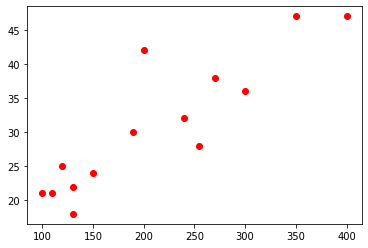

In [8]:
plt.plot(delivery.distance, delivery.time, 'ro')

In [9]:
data = np.array(delivery.distance)
target = np.array(delivery.time)

X_train, X_test, ytrain, ytest = \
    train_test_split( data, target, test_size=0.25, random_state=2208291005)

In [19]:
X_train

array([110, 100, 255, 130, 120, 270, 300, 130, 150, 400])

In [10]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), ytrain)
pred = lr.predict(X_test.reshape(-1,1))

print(lr.coef_, lr.intercept_)
print(mean_squared_error(data, target))  # 올바른 값은 아님
print(r2_score(ytest, pred))  # 올바른 값은 아님

ValueError: Expected 2D array, got 1D array instead:
array=[110 100 255 130 120 270 300 130 150 400].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

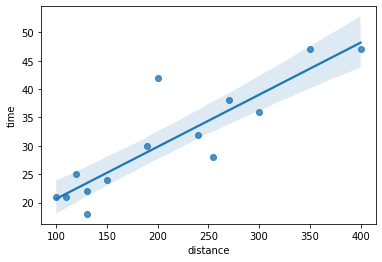

In [11]:
import seaborn as sns
sns.regplot(data=delivery, x='distance', y='time')
plt.show()

In [12]:
dist = np.array(200).reshape(-1,1)
time = lr.predict(dist)
time

array([28.30300468])

## 최소제곱법

* 회귀계수를 구하는 다양한 방법이 존재
* 여기서는 최소제곱법OLS을 이용해서 회귀계수를 구해봄
* 하지만, 이 공식만으로는 해결할 수 없는 부분이 존재
* 즉, 여러 개의 독립변수가 존재하는 다항회귀에서 회귀계수를 
구하는 것은 쉽지 않음
   + 연립방정식, 편미분 이용
   + 그래서, 평균제곱오차MSE를 이용해서 해결 (딥러닝)
$$ \hat {a} =  
        {\sum {(x - \bar x)(y - \bar y)} \over 
           \sum {(x - \bar x)^2}} $$

$$ \hat {b} = {\bar y} - a{\bar x} $$

## 최소제곱법OLS를 이용해서 시간대비 성적 분석


In [13]:
# ex) 공부한 시간 대비 성적을 예측하는 모델을 생성
# 만일, 10시간 공부하면 점수는 얼마인가?
time = [2,4,6,8]
jumsu = [81,93,91,97]

In [14]:
# 기울기 : a
t_mean = np.mean(time)
j_mean = np.mean(jumsu)

# 분자
def divtop(x, xm, y, ym):
    sums = 0
    for i in range(len(x)):
        sums += (x[i] - xm)*(y[i] - ym)
    return sums

dividen = divtop(time, t_mean, jumsu, j_mean)

# 분모
divsor = sum([ (x - t_mean)** 2 for x in time])

a = dividen / divsor
a

2.3

In [15]:
# 절편 : b
b = j_mean - (t_mean * a)
b

79.0

In [16]:
# 회귀선 시각화
# 선형방정식 = y = 2.3x + 79
z = [ (a*x + b) for x in time ]  # 예측값 

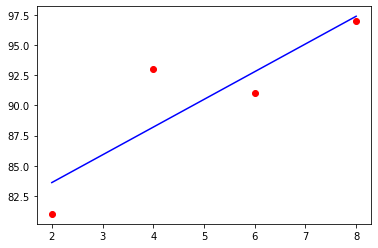

In [17]:
plt.plot(time, jumsu, 'ro')
plt.plot(time, z, 'b')
plt.show()